In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib as mpl


%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz
test.csv
train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz
train.csv



In [2]:

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    C = tf.constant(C ,name='C')
    
    one_hot_matrix = tf.one_hot(labels, C, axis=1)
    
    sess = tf.Session()
    
    one_hot = sess.run(one_hot_matrix)#, feed_dic={})
    
    sess.close()
    
    return one_hot

In [3]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [4]:
df_train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df_train.iloc[:,1:].values/255
y = df_train.iloc[:,0].values
y_onehot = one_hot_matrix(np.array(y), 10)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, random_state=42)

In [8]:
X_train_reshaped = X_train.reshape(X_train.shape[0], 28,28, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], 28,28, 1)
X_train_reshaped.shape

(31500, 28, 28, 1)

label : 1


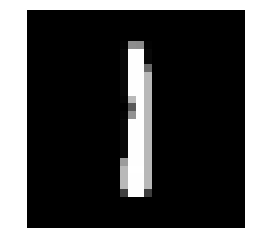

In [9]:
plot_image(np.reshape(X[2], (28,28)))
print ('label :', np.argmax(y_onehot[2]))

In [18]:
n_sample, height, width, channels = X_train_reshaped.shape
L_RATE = 0.001

conv1_features = 32
conv1_filters = 3
conv1_stride = 1
conv1_padding = "SAME"

conv2_features = 64
conv2_filters = 3
conv2_stride = 2
conv2_padding = "SAME"

pool1_features = conv2_features

n_fc1 = 64
n_output_layers = 10

# Tensor Graph <br>
<Br>

<b>Layer Structure</b> <br>

- Input layer : Data shape = [ None, 28, 28, 1] <br>
- Conv1 layer : Filter 3x3 D32, Stride 1 <br>
- Conv2 layer : Filter 3x3 D64, Stride 2 <br>
- Pool1 layer : 2x2 (Max pooling) D64 <br>
- Fully Connected layer : 7*7*64 = 3136 (1-D layer) => 64 <br>
- Output Layer : 10 (softmax - classification ) <br> 

<br><br>


In [19]:
reset_graph()
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
    y = tf.placeholder(tf.int32, shape=[None, n_output_layers], name="y")
    
with tf.name_scope("conv1"):
    conv1 = tf.layers.conv2d(X, filters=conv1_features, kernel_size=conv1_filters,
                         strides=conv1_stride, padding=conv1_padding,
                         activation=tf.nn.relu, name="conv1")

with tf.name_scope("conv1"):
    conv2 = tf.layers.conv2d(conv1, filters=conv2_features, kernel_size=conv2_filters,
                         strides=conv2_stride, padding=conv2_padding,
                         activation=tf.nn.relu, name="conv2")
    
with tf.name_scope("pool1"):
    pool1 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID", name='pool1')
    pool1_flat = tf.reshape(pool1, shape=[-1, pool1_features * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool1_flat, n_fc1, activation=tf.nn.relu, name="fc1")
    
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_output_layers, name="output")

In [26]:
print (conv1.shape)
print (conv2.shape)
print (pool1.shape)
print (pool1_flat.shape)
print (fc1.shape)
print (logits.shape)
print (y.shape)

(?, 28, 28, 32)
(?, 14, 14, 64)
(?, 7, 7, 64)
(?, 3136)
(?, 64)
(?, 10)
(?, 10)


In [21]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate = L_RATE).minimize(cost)

with tf.name_scope("eval"):
    #correct = tf.nn.in_top_k(logits, y, 1)
    correct_prediction = tf.equal(tf.argmax(logits, axis=1), tf.argmax(y, axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    #saver = tf.train.Saver()

In [23]:
X_test_reshaped.shape

(10500, 28, 28, 1)

Epoch 0: Cost - 1.0454 Train Acc - 96.94 Test Acc - 96.47
Epoch 1: Cost - 0.2557 Train Acc - 98.03 Test Acc - 97.37
Epoch 2: Cost - 0.1730 Train Acc - 98.51 Test Acc - 97.88
Epoch 3: Cost - 0.1271 Train Acc - 98.97 Test Acc - 98.12
Epoch 4: Cost - 0.0951 Train Acc - 99.30 Test Acc - 98.38
Epoch 5: Cost - 0.0716 Train Acc - 99.51 Test Acc - 98.55
Epoch 6: Cost - 0.0543 Train Acc - 99.56 Test Acc - 98.40
Epoch 7: Cost - 0.0498 Train Acc - 99.63 Test Acc - 98.38
Epoch 8: Cost - 0.0429 Train Acc - 99.40 Test Acc - 98.24
Epoch 9: Cost - 0.0381 Train Acc - 99.67 Test Acc - 98.57
Epoch 10: Cost - 0.0331 Train Acc - 99.34 Test Acc - 98.10
Epoch 11: Cost - 0.0234 Train Acc - 99.75 Test Acc - 98.47
Epoch 12: Cost - 0.0238 Train Acc - 99.82 Test Acc - 98.57
Epoch 13: Cost - 0.0271 Train Acc - 99.90 Test Acc - 98.64
Epoch 14: Cost - 0.0118 Train Acc - 99.99 Test Acc - 98.81
Epoch 15: Cost - 0.0147 Train Acc - 99.88 Test Acc - 98.70
Epoch 16: Cost - 0.0222 Train Acc - 99.94 Test Acc - 98.69
Epoch 1

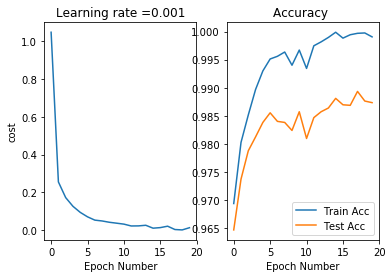

In [25]:
n_epochs = 20
batch_size = 100
m = len(X_train_reshaped)

cost_list =[]
train_acc_list=[]
test_acc_list=[]

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        epoch_cost = 0
        for iteration in range(m // batch_size):
            X_batch = X_train_reshaped[iteration*batch_size:(iteration+1)*batch_size]
            y_batch = y_train[iteration*batch_size:(iteration+1)*batch_size]
            _, batch_cost = sess.run([optimizer, cost], feed_dict={X: X_batch, y: y_batch})
            epoch_cost += batch_cost / batch_size
        
        epoch_train_acc = accuracy.eval({X: X_train_reshaped, y: y_train})
        epoch_test_acc = accuracy.eval({X: X_test_reshaped, y: y_test})
        
        cost_list.append(epoch_cost)
        train_acc_list.append(epoch_train_acc)
        test_acc_list.append(epoch_test_acc)
        
        print ('Epoch %i: Cost - %0.4f Train Acc - %0.2f Test Acc - %0.2f' 
               % (epoch, epoch_cost, 100*epoch_train_acc, 100*epoch_test_acc) )
    
    
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.squeeze(cost_list))
ax[0].set_ylabel('cost')
ax[0].set_xlabel('Epoch Number')
ax[0].set_title("Learning rate =" + str(L_RATE))

ax[1].plot(train_acc_list, label="Train Acc")
ax[1].plot(test_acc_list, label="Test Acc")
ax[1].set_xlabel('Epoch Number')
ax[1].set_title("Accuracy ")
ax[1].legend()

plt.show()